In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Import data
data = pd.read_excel('../survival.xlsx')

# Drop ID column
data = data.drop('id', axis=1)

# Find object columns and convert to categorical columns
col_object = data.dtypes[data.dtypes == object].index.tolist()

for col in col_object:
    data[col] = data[col].astype('category')

# Drop samples with missing target
data = data.dropna(subset='duration_m')

# Drop censored individuals
data = data.loc[data['status'] == True]


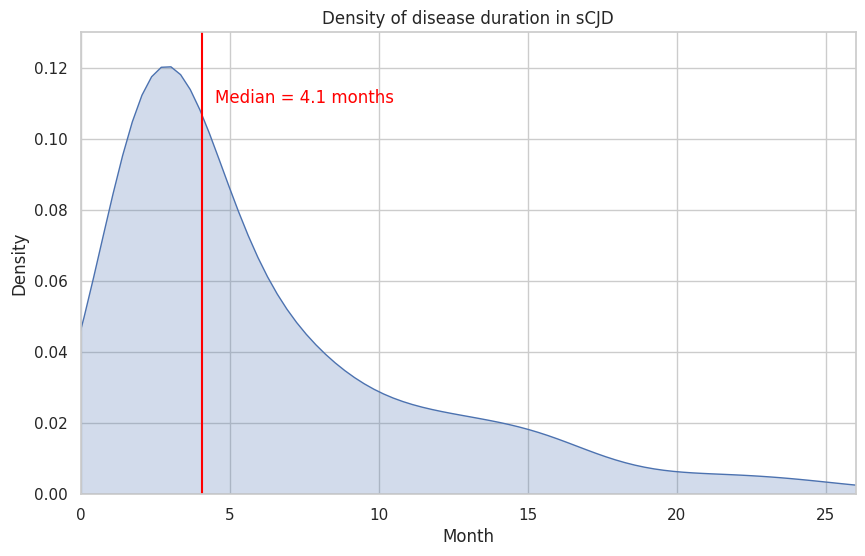

In [50]:
sns.set_theme(
    style='whitegrid',
    font='sans-serif',
    rc={'figure.figsize':(10,6)}
)

plot = sns.kdeplot(
    data,
    x='duration_m',
    fill=True,
)

plot.vlines(
    x=data.duration_m.median(), 
    ymin=0,
    ymax=0.13,
    colors=['red']
)
plot.text(
    s='Median = 4.1 months',
    x=4.5,
    y=0.11,
    color='red'
)

plot.set_xlim(0, 26)
plot.set_xlabel('Month')
plot.set_title('Density of disease duration in sCJD')

plot.set_ylim(0,0.13)

fig = plot.get_figure()
fig.savefig('./figure1.png', dpi=300)

In [64]:
# Survivors beyond 12 and 24 months

duration = data.duration_m

duration.loc[duration >= 24].shape[0]/len(data)

0.0183206106870229

In [71]:
data.mriimp.value_counts()

mriimp
P    567
S     43
N     17
Name: count, dtype: int64

In [74]:
1119 + 343 + 667 + 64 + 70 + 98 + 1127

3488